In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from math import sqrt

In [3]:
# Load the dataset
file_path = 'kc_house_data.csv'
data = pd.read_csv(file_path)

In [4]:
# Check if there is any nulls
null_counts = data.isna().sum()
print("Number of Null itmes in each column: ", null_counts)

Number of Null itmes in each column:  id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [7]:
# Check for duplicates
for column in final_data.columns:
    duplicates = final_data[column].duplicated().any()
    print(f"Column '{column}' has duplicates: {duplicates}")

Column 'id' has duplicates: False
Column 'date' has duplicates: True
Column 'price' has duplicates: True
Column 'bedrooms' has duplicates: True
Column 'bathrooms' has duplicates: True
Column 'sqft_living' has duplicates: True
Column 'sqft_lot' has duplicates: True
Column 'floors' has duplicates: True
Column 'waterfront' has duplicates: True
Column 'view' has duplicates: True
Column 'condition' has duplicates: True
Column 'grade' has duplicates: True
Column 'sqft_above' has duplicates: True
Column 'sqft_basement' has duplicates: True
Column 'yr_built' has duplicates: True
Column 'yr_renovated' has duplicates: True
Column 'zipcode' has duplicates: True
Column 'lat' has duplicates: True
Column 'long' has duplicates: True
Column 'sqft_living15' has duplicates: True
Column 'sqft_lot15' has duplicates: True


In [5]:
# Assuming 'data' is your DataFrame with 'id' and 'price' columns
# Step 1: Calculate the average price per ID
average_prices = data.groupby('id')['price'].mean().reset_index()

# Step 2: Merge the average prices with the original DataFrame
merged_data = data.merge(average_prices, on='id', suffixes=('', '_avg'))

# Step 3: Replace the original price with the averaged price
merged_data['price'] = merged_data['price_avg']
merged_data.drop(columns=['price_avg'], inplace=True)

# Step 4: Drop duplicate IDs
final_data = merged_data.drop_duplicates(subset='id')

In [6]:
# Check for duplicates
for column in final_data.columns:
    duplicates = final_data[column].duplicated().any()
    print(f"Column '{column}' has duplicates: {duplicates}")

Column 'id' has duplicates: False
Column 'date' has duplicates: True
Column 'price' has duplicates: True
Column 'bedrooms' has duplicates: True
Column 'bathrooms' has duplicates: True
Column 'sqft_living' has duplicates: True
Column 'sqft_lot' has duplicates: True
Column 'floors' has duplicates: True
Column 'waterfront' has duplicates: True
Column 'view' has duplicates: True
Column 'condition' has duplicates: True
Column 'grade' has duplicates: True
Column 'sqft_above' has duplicates: True
Column 'sqft_basement' has duplicates: True
Column 'yr_built' has duplicates: True
Column 'yr_renovated' has duplicates: True
Column 'zipcode' has duplicates: True
Column 'lat' has duplicates: True
Column 'long' has duplicates: True
Column 'sqft_living15' has duplicates: True
Column 'sqft_lot15' has duplicates: True


In [ ]:
#categorical_vars = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
#final_data[categorical_vars] = final_data[categorical_vars].astype('category')

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


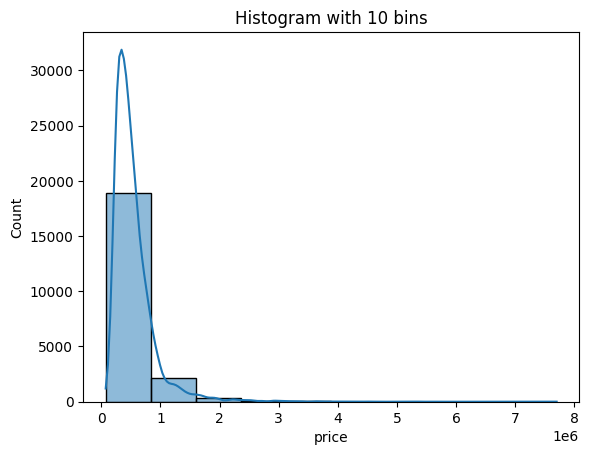

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


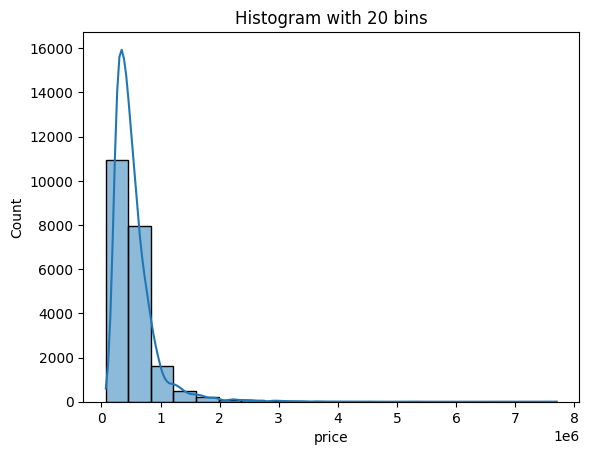

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


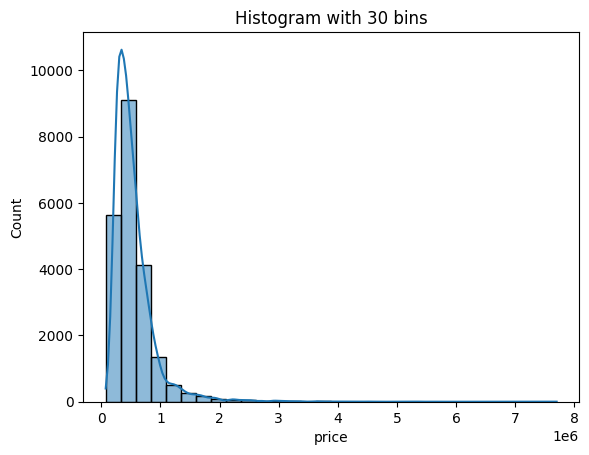

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


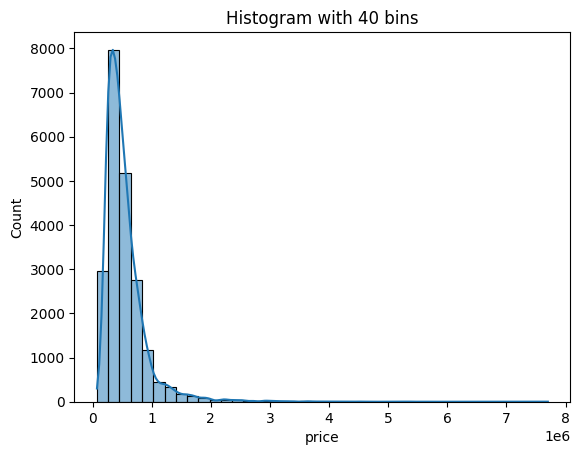

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


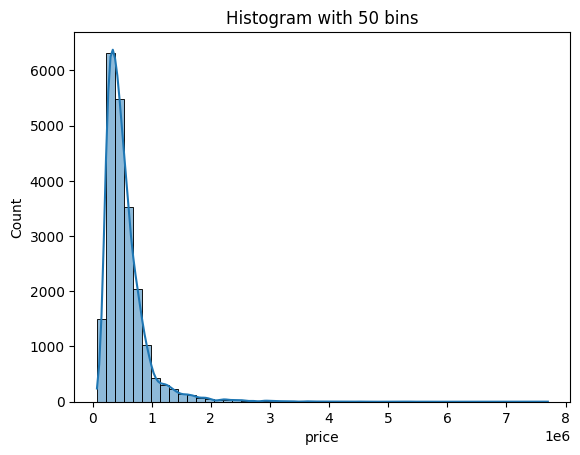

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


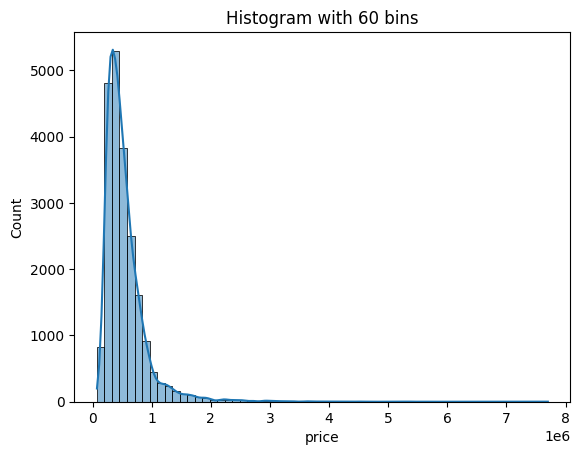

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


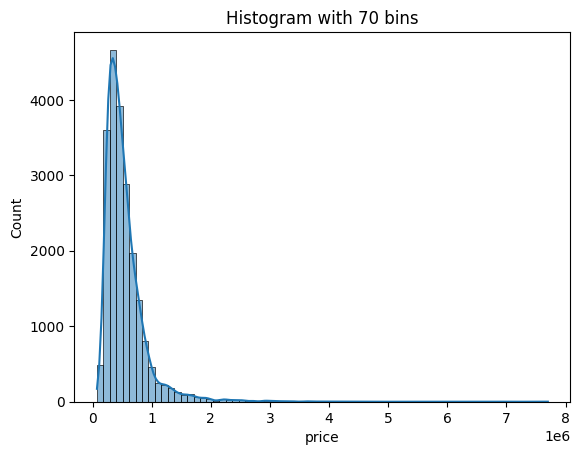

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


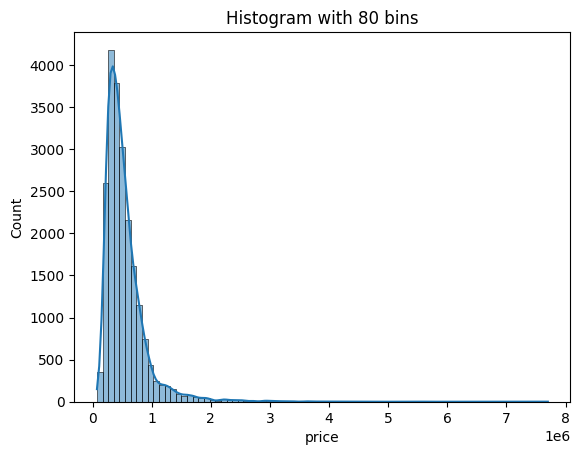

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


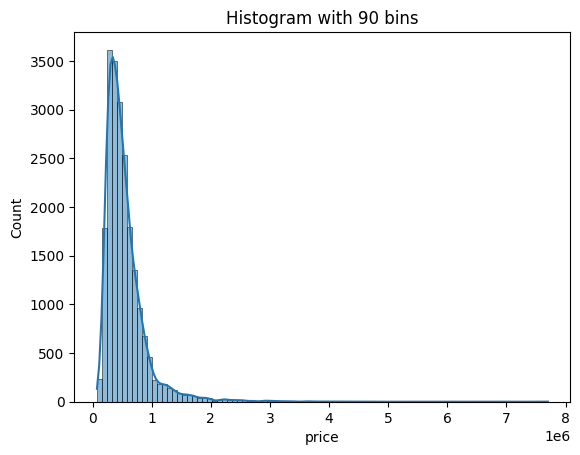

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


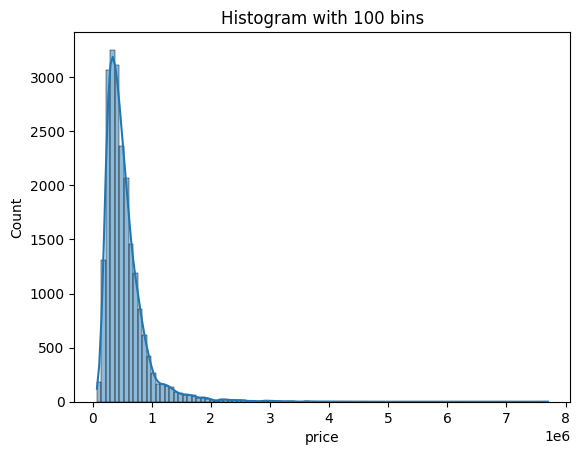

In [7]:
possible_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust this list based on your data
for bins in possible_bins:
    bin_edges = np.histogram_bin_edges(final_data['price'], bins=bins)
    sns.histplot(final_data['price'], bins=bin_edges, kde=True)
    plt.title(f'Histogram with {bins} bins')
    plt.show()

In [16]:
selected_bins = 60  # Example value
bin_edges = np.histogram_bin_edges(final_data['price'], bins=selected_bins)
final_data.loc[:, 'bin'] = np.digitize(final_data['price'], bins=bin_edges)

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


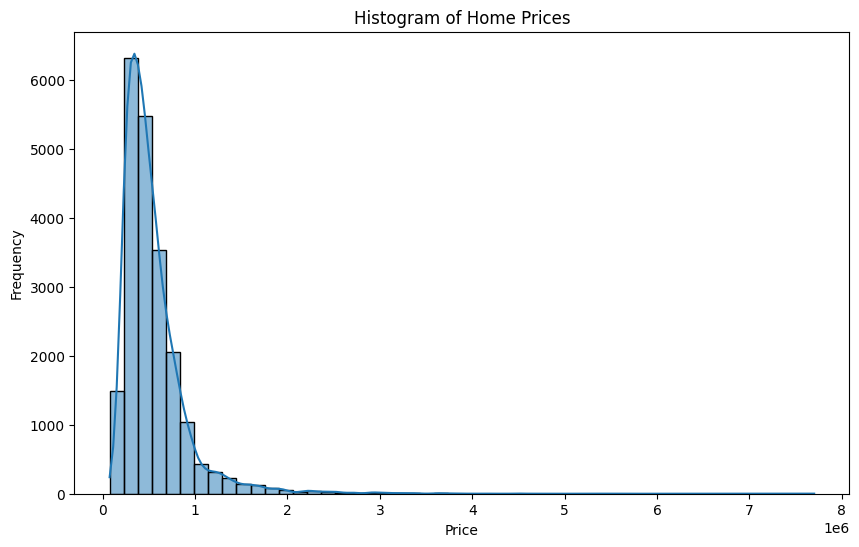

In [17]:
price_data = final_data['price'].values
hist_bins = np.histogram_bin_edges(price_data, bins=50)
plt.figure(figsize=(10, 6))
sns.histplot(price_data, bins=hist_bins, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Home Prices')
plt.show()

In [12]:
final_data.head()
all_columns = final_data.columns.tolist()
print(all_columns)
numerical_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
# Create a StandardScaler and fit it to 'set1' for the numeric columns
scaler = StandardScaler()
scaler.fit(final_data[numerical_columns])
final_data.head()

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bin']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bin
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,5
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,4


In [14]:

numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']# Split the dataset into training and testing sets
X = final_data[numerical_columns]
y = final_data['price']

# Initialize variables to store the best RMSE and MAPE features
best_rmse_features = []
best_mape_features = []

# Initialize variables to store the best RMSE and MAPE scores
best_rmse = float('inf')  # Initialize with a large value
best_mape = float('inf')

# Perform stepwise feature selection
for feature in numerical_columns:
    X_temp = X[best_rmse_features + [feature]]  # Add the current feature for RMSE
    X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)

    # Initialize and train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict house prices on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    # If adding the current feature improves RMSE, update the list and score
    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_features.append(feature)

    # Similarly, calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # If adding the current feature improves MAPE, update the list and score
    if mape < best_mape:
        best_mape = mape
        best_mape_features.append(feature)

    # Keep only the top 5 features for RMSE and MAPE
    best_rmse_features = best_rmse_features[:5]
    best_mape_features = best_mape_features[:5]

print("Top 5 features for RMSE:", best_rmse_features)
print("Top 5 features for MAPE:", best_mape_features)
print("Best RMSE:", best_rmse)
print("Best MAPE:", best_mape)

Top 5 features for RMSE: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above']
Top 5 features for MAPE: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'yr_built']
Best RMSE: 226241.4221820908
Best MAPE: 28.958289235593064


                                             Features           RMSE  \
0                                            bedrooms  324562.943829   
1                                 bedrooms, bathrooms  293923.267725   
2                    bedrooms, bathrooms, sqft_living  245794.839680   
3          bedrooms, bathrooms, sqft_living, sqft_lot  245281.336809   
4   bedrooms, bathrooms, sqft_living, sqft_lot, fl...  245284.042970   
5   bedrooms, bathrooms, sqft_living, sqft_lot, fl...  245118.895017   
6   bedrooms, bathrooms, sqft_living, sqft_lot, fl...  245118.895017   
7   bedrooms, bathrooms, sqft_living, sqft_lot, fl...  232609.923110   
8   bedrooms, bathrooms, sqft_living, sqft_lot, fl...  232387.459474   
9   bedrooms, bathrooms, sqft_living, sqft_lot, fl...  232296.175204   
10  bedrooms, bathrooms, sqft_living, sqft_lot, fl...  229968.874167   
11  bedrooms, bathrooms, sqft_living, sqft_lot, fl...  229436.173021   

         MAPE  
0   49.311083  
1   43.152602  
2   35.481812  

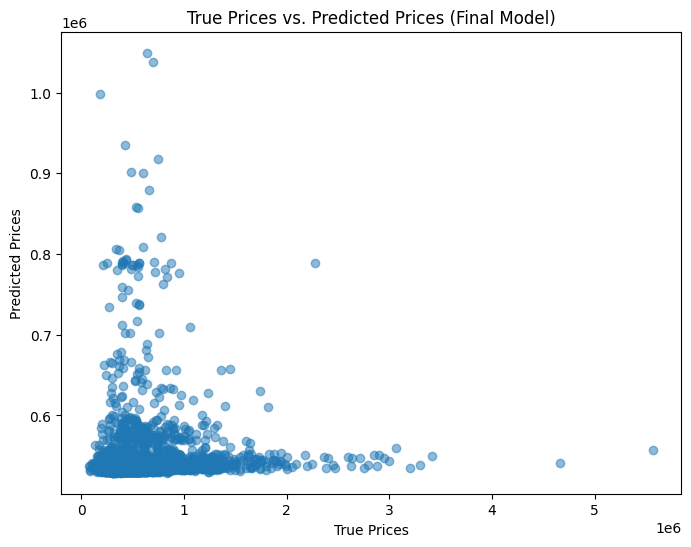

In [18]:
# Define the list of numerical input features
numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement',
                     'yr_built', 'yr_renovated', 'zipcode',
                     'sqft_living15', 'sqft_lot15']

# Initialize an empty list to store the selected features
selected_features = []

# Initialize variables to store the best RMSE and MAPE
best_rmse = float('inf')  # Initialize with a large value
best_mape = float('inf')

# Split the dataset into training and testing sets
X = final_data[numerical_columns]
y = final_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list to store RMSE and MAPE for each feature selection step
results_list = []

# Initialize and train a linear regression model one feature at a time
for feature in numerical_columns:
    selected_features.append(feature)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    # Predict house prices on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Update best RMSE and MAPE if necessary
    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_feature = feature
    if mape < best_mape:
        best_mape = mape
        best_mape_feature = feature

    # Append the results to the list
    results_list.append([', '.join(selected_features), rmse, mape])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list, columns=['Features', 'RMSE', 'MAPE'])

# Print the DataFrame with RMSE and MAPE for each feature selection step
print(results_df)

print("Best RMSE Feature:", best_rmse_feature)
print("Best RMSE:", best_rmse)
print("Best MAPE Feature:", best_mape_feature)
print("Best MAPE:", best_mape)

# Train the final model using the best feature set
final_selected_features = [best_rmse_feature, best_mape_feature]
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

# Predict house prices on the test set using the final model
y_pred_final = final_model.predict(X_test_final)

# Calculate RMSE and MAPE for the final model
final_rmse = sqrt(mean_squared_error(y_test, y_pred_final))
final_mape = np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100

print("Final Model RMSE:", final_rmse)
print("Final Model MAPE:", final_mape)

# Plot predicted prices vs. true prices for the final model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs. Predicted Prices (Final Model)")
plt.show()

In [ ]:

# Define the list of numerical input features
numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                     'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                     'sqft_living15', 'sqft_lot15']

# Initialize an empty list to store the selected features
selected_features = []

# Initialize variables to store the best RMSE and MAPE
best_rmse = float('inf')  # Initialize with a large value
best_mape = float('inf')

# Split the dataset into training and testing sets
X = final_data[numerical_columns]
y = final_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list to store RMSE and MAPE for each feature selection step
rmse_scores = []
mape_scores = []

# Initialize and train a linear regression model one feature at a time
for feature in numerical_columns:
    selected_features.append(feature)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    # Predict house prices on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_scores.append(mape)

    # Update best RMSE and MAPE if necessary
    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_feature = feature
    if mape < best_mape:
        best_mape = mape
        best_mape_feature = feature

# Plot RMSE and MAPE scores for each feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(numerical_columns, rmse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Features')
plt.ylabel('RMSE')
plt.title('RMSE for Each Feature')

plt.subplot(1, 2, 2)
plt.plot(numerical_columns, mape_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Features')
plt.ylabel('MAPE (%)')
plt.title('MAPE for Each Feature')

plt.tight_layout()
plt.show()

print("Best RMSE Feature:", best_rmse_feature)
print("Best RMSE:", best_rmse)
print("Best MAPE Feature:", best_mape_feature)
print("Best MAPE:", best_mape)

# Train the final model using the best feature set
final_selected_features = [best_rmse_feature, best_mape_feature]
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

# Predict house prices on the test set using the final model
y_pred_final = final_model.predict(X_test_final)

# Calculate RMSE and MAPE for the final model
final_rmse = sqrt(mean_squared_error(y_test, y_pred_final))
final_mape = np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100

print("Final Model RMSE:", final_rmse)
print("Final Model MAPE:", final_mape)

# Plot predicted prices vs. true prices for the final model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs. Predicted Prices (Final Model)")
plt.show()

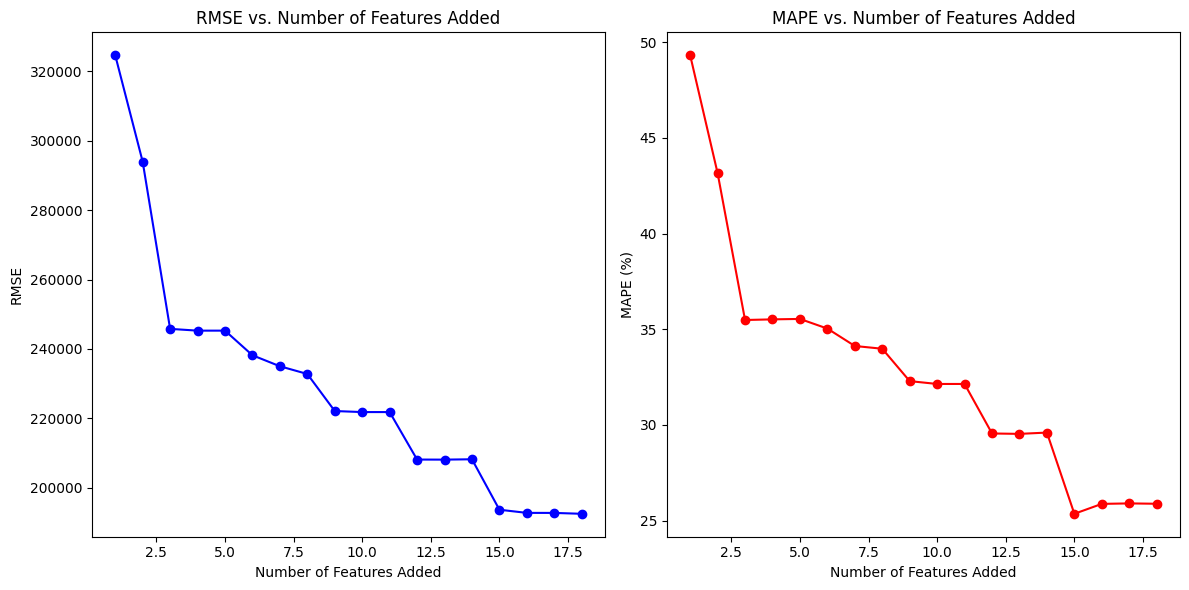

Best RMSE Feature: sqft_lot15
Best RMSE: 192554.16916674515
Best MAPE Feature: lat
Best MAPE: 25.35887878708232
Final Model RMSE: 323886.5445522545
Final Model MAPE: 43.74394411150123


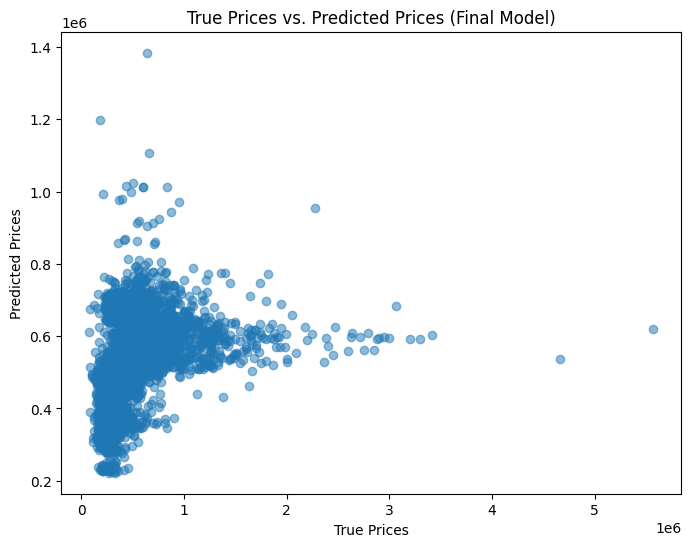

In [8]:
#Define the list of numerical input features
numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                     'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                     'sqft_living15', 'sqft_lot15']

# Initialize an empty list to store the selected features
selected_features = []

# Initialize variables to store the best RMSE and MAPE
best_rmse = float('inf')  # Initialize with a large value
best_mape = float('inf')

# Split the dataset into training and testing sets
X = final_data[numerical_columns]
y = final_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list to store RMSE and MAPE for each feature selection step
rmse_scores = []
mape_scores = []

# Initialize and train a linear regression model one feature at a time
for feature in numerical_columns:
    selected_features.append(feature)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    # Predict house prices on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mape_scores.append(mape)

    # Update best RMSE and MAPE if necessary
    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_feature = feature
    if mape < best_mape:
        best_mape = mape
        best_mape_feature = feature

# Plot RMSE and MAPE scores for each feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(selected_features) + 1), rmse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features Added')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Features Added')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(selected_features) + 1), mape_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Features Added')
plt.ylabel('MAPE (%)')
plt.title('MAPE vs. Number of Features Added')

plt.tight_layout()
plt.show()

print("Best RMSE Feature:", best_rmse_feature)
print("Best RMSE:", best_rmse)
print("Best MAPE Feature:", best_mape_feature)
print("Best MAPE:", best_mape)

# Train the final model using the best feature set
final_selected_features = [best_rmse_feature, best_mape_feature]
X_train_final = X_train[final_selected_features]
X_test_final = X_test[final_selected_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

# Predict house prices on the test set using the final model
y_pred_final = final_model.predict(X_test_final)

# Calculate RMSE and MAPE for the final model
final_rmse = sqrt(mean_squared_error(y_test, y_pred_final))
final_mape = np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100

print("Final Model RMSE:", final_rmse)
print("Final Model MAPE:", final_mape)

# Plot predicted prices vs. true prices for the final model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs. Predicted Prices (Final Model)")
plt.show()

In [19]:
categorical_columns = ['waterfront', 'condition']

# Create dummy variables
final_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
final_data.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  view  grade  ...  zipcode      lat  \
0             1180      5650     1.0     0      7  ...    98178  

In [20]:
set1 = final_data[final_data['price'].apply(lambda x: random.random() < 0.75)]
set2 = final_data[final_data['price'].apply(lambda x: random.random() >= 0.75)]
print(f'Set 1 size: {len(set1)} records')
print(f'Set 2 size: {len(set2)} records')

Set 1 size: 16241 records
Set 2 size: 5460 records


In [21]:
numeric_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']

# Create a StandardScaler and fit it to 'set1' for the numeric columns
scaler = StandardScaler()
scaler.fit(set1[numeric_columns])

# Transform both 'set1' and 'set2' using the same scaler for numeric columns
set1_scaled = set1.copy()
set1_scaled[numeric_columns] = scaler.transform(set1[numeric_columns])

set2_scaled = set2.copy()
set2_scaled[numeric_columns] = scaler.transform(set2[numeric_columns])


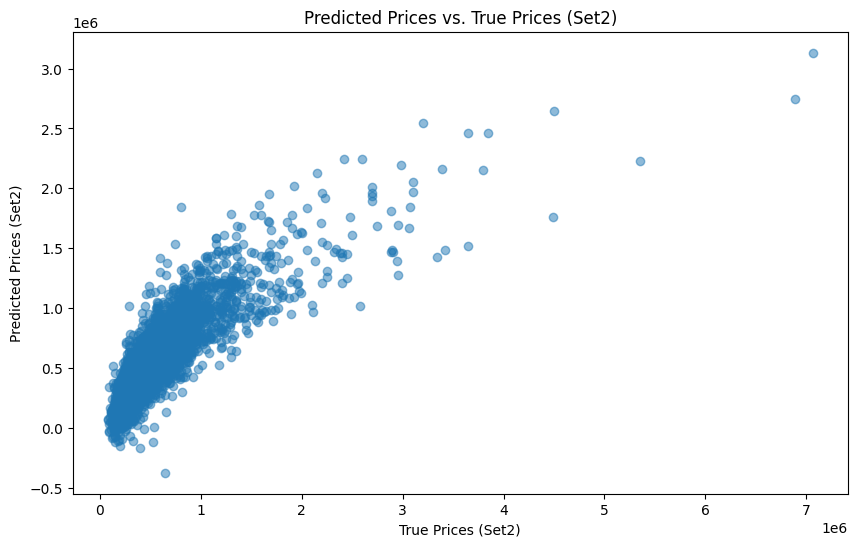

RMSE: 215709.56
MAPE: 25.73%


In [22]:
non_numeric_columns = ['date']  # Add any other non-numeric columns as needed
X_train = set1_scaled.drop(columns=['price'] + non_numeric_columns)
y_train = set1_scaled['price']

X_test = set2_scaled.drop(columns=['price'] + non_numeric_columns)
y_test = set2_scaled['price']

# Train a linear regression model on set1
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for set2
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Plot predicted prices against true prices for set2
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Prices (Set2)')
plt.ylabel('Predicted Prices (Set2)')
plt.title('Predicted Prices vs. True Prices (Set2)')
plt.show()

# Print RMSE and MAPE
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

In [ ]:
# Predict house prices on the test set
y_pred = model.predict(X_test_extended)

# Calculate residuals
residuals = y_test - y_pred

# Calculate RMSE (Root Mean Squared Error) on the test set
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Sort the records by the absolute values of residuals to identify the worst predictions
worst_predictions = test_df.copy()
worst_predictions['residual'] = residuals
worst_predictions['abs_residual'] = abs(residuals)
worst_predictions = worst_predictions.sort_values(by='abs_residual', ascending=False)

# Explore the properties with the worst predictions (e.g., top 10)
top_worst_properties = worst_predictions.head(10)

# Print top properties with worst predictions
print(top_worst_properties)


In [ ]:
# Load Dataset 2 (population and demographics data)
dataset2 = pd.read_csv('population_by_zip_2010.csv')  # Adjust the file path

# Data Cleaning and Selection for Dataset 2
selected_columns = ['population', 'zip code']  # Add other relevant columns as needed
dataset2_cleaned = dataset2[selected_columns].copy()

# Join the datasets on 'zip code'
merged_data = dataset1.merge(dataset2_cleaned, on='zip code', how='left')

# Extract features and target variable
X = merged_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'population']]
y = merged_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")